In [69]:
import math
import random
import numpy as np
from matplotlib import pyplot as pp
%matplotlib inline

In [2]:
R = 8.314e-3
T1 = 10.
T2 = 100.
T3 = 1000.

# Examination of Bias

In [10]:
def compute_coords(t, nsamp):
    std = math.sqrt(R * t / 2.0)
    x = np.random.normal(0, std, nsamp)
    return x

In [26]:
def compute_stats(x1, x2, t1, t2):
    E1 = x1**2
    E2 = x2**2
    
    E11 = E1 / R / t1
    E22 = E2 / R / t2
    E12 = E1 / R / t2
    E21 = E2 / R / t1
    
    delta = E11 + E22 - E12 - E21
    acc = np.minimum(1.0, np.exp(delta))
    
    dA1 = (-E1 / R / t1**2 + E2 / R / t1**2) * acc
    dA1[np.where(acc >= .999)] = 0.0

    dA2 = (-E2 / R / t2**2 + E1 / R / t2**2) * acc
    dA2[np.where(acc >= .999)] = 0.0
    
    dE1 = -E1 / R / t1**2
    dE2 = -E2 / R / t2**2
    
    return acc, dA1, dA2, dE1, dE2

In [193]:
def compute_forces(x1, x2, t1, t2):
    stats = compute_stats(x1, x2, t1, t2)
    acc, dA1, dA2, dE1, dE2 = stats
    n = float(dA1.shape[0])
    
    acc_mean = np.mean(acc)
    dA1_mean = np.mean(dA1)
    dA2_mean = np.mean(dA2)
    dE1_mean = np.mean(dE1)
    dE2_mean = np.mean(dE2)
    A_dE1_mean = np.mean(acc * dE1)
    A_dE2_mean = np.mean(acc * dE2)
    
    f1 = dA1_mean - n / (n - 1) * (A_dE1_mean - acc_mean * dE1_mean)
    f2 = dA2_mean - n / (n - 1) * (A_dE2_mean - acc_mean * dE2_mean)

    return f1, f2, acc_mean


In [194]:
compute_forces(compute_coords(10., 100), compute_coords(100., 100), 10., 100.)

(0.020043694135905562, -0.0022376600030330398, 0.40093383292405876)

In [195]:
def compute_triple(x1, x2, x3, t1, t2, t3):
    _, f1, a1 = compute_forces(x1, x2, t1, t2)
    f2, _, a2 = compute_forces(x2, x3, t2, t3)
    return a2 * f1 + a1 * f2

In [202]:
def compute_mean_force(t1, t2, t3, nsamp):
    fs = []
    for _ in range(4000):
        f = compute_triple(
                compute_coords(t1, nsamp),
                compute_coords(t2, nsamp),
                compute_coords(t3, nsamp),
                t1, t2, t3)
        fs.append(f)
    return np.mean(fs)

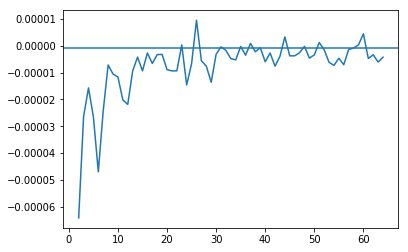

In [203]:

xs = list(range(2, 65))
y1s = []
for x in xs:
    y = compute_mean_force(10., 100., 1000., x)
    y1s.append(y)
pp.plot(xs, y1s)
pp.axhline(compute_mean_force(10., 100., 1000., 2**10))